<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [2]:
# pre-fun

import pandas as pd
import gensim
import re 
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

In [4]:
# more pre-fun: import data

path = '/home/chase/repos/data/'
df = pd.read_csv(path + "/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

In [7]:
# clean brand

df['brand'] = df['brand'].apply(lambda x: x.lower())

In [8]:
df.shape

(28332, 24)

In [9]:
# narrow the dataframe

electronics = df[df['primaryCategories'] == 'Electronics'].reset_index(drop=True)

In [10]:
electronics.head(1)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...


In [11]:
# add "amazon" as a custom stopword

STOPWORDS = STOPWORDS.union(['amazon'])

In [12]:
# define tokenize function

def tokenize(text): 
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [13]:
# create token column

electronics['tokens'] = [tokenize(review) for review in electronics['reviews.text']]

In [14]:
# check df

electronics.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
0,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, place, husband, love, holds, lot..."
1,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[discarding, getting, rid, broken, cd, cases, ..."
2,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[dollars, boycotting]"
3,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[initial, impression, good, material, nicer, s..."
4,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pros, standard, echo, cons, older, generation..."


In [16]:
# create dictionary representation

id2word = corpora.Dictionary(electronics['tokens'])

len(id2word.keys())

7012

In [17]:
# remove extremes

id2word.filter_extremes(no_below=5, no_above=0.95)

In [19]:
# create bag of words representation of corpus

corpus = [id2word.doc2bow(text) for text in electronics['tokens']]

In [20]:
# define coherence values computation

from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated
    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    for iter_ in range(passes):
        print(f"=== Pass {iter_ + 1} of {passes} ===")
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12, passes=5)
            print(f"Model with {num_topics} topics completed.")
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })
        print('\n')
    return coherence_values

In [21]:
# determine the best number of topics to use

coherence_values = compute_coherence_values(dictionary=id2word,
                                           corpus=corpus,
                                           limit=30)

=== Pass 1 of 5 ===
Model with 2 topics completed.
Model with 5 topics completed.
Model with 8 topics completed.
Model with 11 topics completed.
Model with 14 topics completed.
Model with 17 topics completed.
Model with 20 topics completed.
Model with 23 topics completed.
Model with 26 topics completed.
Model with 29 topics completed.


=== Pass 2 of 5 ===
Model with 2 topics completed.
Model with 5 topics completed.
Model with 8 topics completed.
Model with 11 topics completed.
Model with 14 topics completed.
Model with 17 topics completed.
Model with 20 topics completed.
Model with 23 topics completed.
Model with 26 topics completed.
Model with 29 topics completed.


=== Pass 3 of 5 ===
Model with 2 topics completed.
Model with 5 topics completed.
Model with 8 topics completed.
Model with 11 topics completed.
Model with 14 topics completed.
Model with 17 topics completed.
Model with 20 topics completed.
Model with 23 topics completed.
Model with 26 topics completed.
Model with 29 top

In [22]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

/home/chase/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


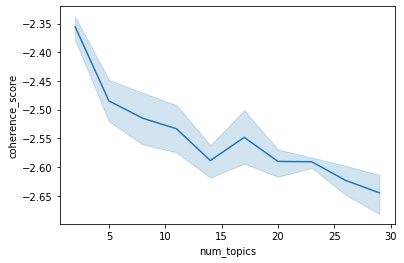

In [24]:
# dope visualization for Artin

import seaborn as sns

ax = sns.lineplot(x='num_topics', y='coherence_score', data=topic_coherence )

In [25]:
# create LDA multicore

lda = LdaMulticore(corpus=corpus,
                  id2word=id2word,
                  random_state=7,
                  num_topics=5, 
                  passes=10, 
                  workers=4)

In [28]:
# clean topics

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"-------Topic {id}-------")
    print(t, end="\n\n")

-------Topic 0-------
kindle use easy gift bought

-------Topic 1-------
tablet great good price use

-------Topic 2-------
great battery like kindle love

-------Topic 3-------
tablet old loves year love

-------Topic 4-------
tablet ipad bought good buy



In [29]:
# interpret 

import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/chase/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.068805 -0.038801       1        1  27.837967
0      0.029358  0.168017       2        1  20.256601
3      0.193753 -0.053278       3        1  19.618832
2     -0.106720  0.015104       4        1  17.905409
4     -0.047585 -0.091042       5        1  14.381186, topic_info=     Category         Freq           Term        Total  loglift  logprob
104   Default  1274.000000           year  1274.000000  30.0000  30.0000
759   Default  2347.000000         kindle  2347.000000  29.0000  29.0000
791   Default  1778.000000          loves  1778.000000  28.0000  28.0000
79    Default  1649.000000            old  1649.000000  27.0000  27.0000
536   Default  5854.000000         tablet  5854.000000  26.0000  26.0000
1136  Default  1386.000000          games  1386.000000  25.0000  25.0000
687   Default   946.000000           gift   946.000000  24.0000  24.0000
5     Default  2484.000000           love  2484.000000  23.0000  23.0000
1048  Default  1833.000000           kids  1833.000000  22.0000  22.0000
622   Default  2309.000000         bought  2309.000000  21.0000  21.0000
60    Default  2333.000000           easy  2333.000000  20.0000  20.0000
568   Default  1261.000000          books  1261.000000  19.0000  19.0000
714   Default   680.000000           ipad   680.000000  18.0000  18.0000
685   Default   712.000000      christmas   712.000000  17.0000  17.0000
1178  Default   743.000000       daughter   743.000000  16.0000  16.0000
664   Default   912.000000           read   912.000000  15.0000  15.0000
86    Default  1903.000000          price  1903.000000  14.0000  14.0000
781   Default   679.000000        battery   679.000000  13.0000  13.0000
66    Default  2318.000000           good  2318.000000  12.0000  12.0000
422   Default   749.000000            son   749.000000  11.0000  11.0000
613   Default   298.000000           user   298.000000  10.0000  10.0000
1983  Default   325.000000       parental   325.000000   9.0000   9.0000
906   Default   950.000000        reading   950.000000   8.0000   8.0000
423   Default   393.000000           wife   393.000000   7.0000   7.0000
1146  Default   309.000000  granddaughter   309.000000   6.0000   6.0000
1186  Default   424.000000         google   424.000000   5.0000   5.0000
123   Default   296.000000          alexa   296.000000   4.0000   4.0000
1642  Default   378.000000       grandson   378.000000   3.0000   3.0000
28    Default   957.000000           play   957.000000   2.0000   2.0000
194   Default  1534.000000           apps  1534.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
195    Topic5   294.168915            buy   965.045776   0.7512  -4.4517
586    Topic5    72.153732       products   133.682953   1.3226  -5.8570
803    Topic5    77.230858           help   148.443893   1.2858  -5.7890
322    Topic5    99.645302          comes   223.756378   1.1303  -5.5342
536    Topic5   831.625122         tablet  5854.783203  -0.0124  -3.4125
45     Topic5   156.448898           work   451.224243   0.8800  -5.0831
1894   Topic5   106.444443             gb   254.131851   1.0690  -5.4682
176    Topic5    97.190819          times   220.525604   1.1199  -5.5592
191    Topic5   223.375412           best   927.795227   0.5153  -4.7270
347    Topic5   120.008057            way   339.465912   0.8994  -5.3483
622    Topic5   361.688232         bought  2309.105469   0.0854  -4.2451
66     Topic5   349.386810           good  2318.020508   0.0470  -4.2797
270    Topic5   139.934845           need   493.785187   0.6783  -5.1947
382    Topic5   194.464935      purchased   963.192139   0.3392  -4.8656
20     Topic5   227.631500           like  1413.421997   0.1132  -4.7081
89     Topic5   205.680038        product  1160.356201   0.2091  -4.8095
86     Topic5   249.640320          price  1903.060303  -0.0919  -4.6158
42

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling